# Import data and libraries

In [1]:
# import data handling libraries
import numpy as np
import pandas as pd

#import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import libraries to time series
from statsmodels.tsa.seasonal import seasonal_decompose

#set graph styles
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [15, 10]

Source : https://data.world/data-society/air-traffic-passenger-data

In [2]:
#import data
Air_traiffic = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

# Overview

In [3]:
# Explore of metadata
Air_traiffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [4]:
# identify earliest data
Air_traiffic["Year"].min()

2005

In [5]:
# identify oldest data
Air_traiffic["Year"].max()

2016

*As the month column is a string, it needs to be changed to a datetime in order for python to handle the data correctly. For ease, all dates have been set to the start of the month. Also in later code it is preferable to have standalone non-string month data and this is also created in the below code.*

In [6]:
# create a datetime column
Air_traiffic["Period_no"] = pd.to_datetime(Air_traiffic["Year"].astype(str) + Air_traiffic["Month"], format = "%Y%B")

# create a month no. column
Air_traiffic['Month_no'] = Air_traiffic['Period_no'].apply(lambda r:r.month)

In [7]:
Air_traiffic.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Period_no,Month_no
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July,2005-07-01,7
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July,2005-07-01,7
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July,2005-07-01,7
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July,2005-07-01,7
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July,2005-07-01,7


# International

In [8]:
# assess GEO Summary data
Air_traiffic["GEO Summary"].value_counts()

International    9210
Domestic         5797
Name: GEO Summary, dtype: int64

In [9]:
print(round((sum(Air_traiffic["GEO Summary"]== "International")/Air_traiffic.shape[0])*100,1), "% of the dataset is for internationla flights")

61.4 % of the dataset is for internationla flights


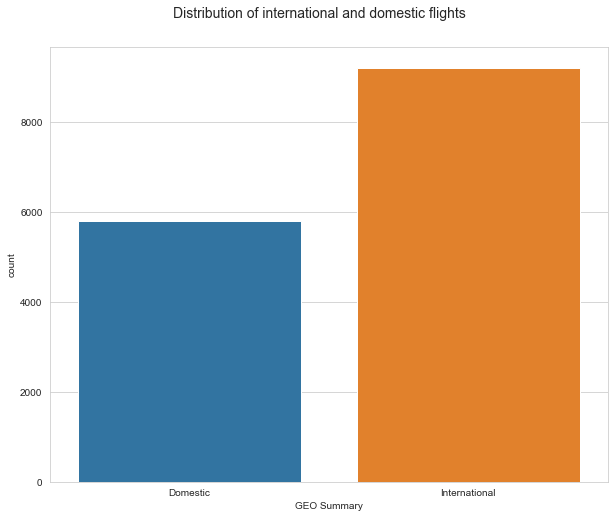

In [10]:
#graph of GEO Summary data
plt.figure(figsize = (10,8))
sns.countplot(x = "GEO Summary", data =Air_traiffic )
plt.suptitle("Distribution of international and domestic flights", fontsize = 14, y = .95)
plt.show()

In [11]:
# Create international and domestic subsets for further analysis
International = Air_traiffic[Air_traiffic["GEO Summary"] =="International" ]
Domestic = Air_traiffic[Air_traiffic["GEO Summary"] =="Domestic" ]

In [12]:
# No. of airlines servicing international flights
International["Operating Airline"].nunique()

54

In [13]:
# No. of airlines servicing domestic flights
Domestic["Operating Airline"].nunique()

36

In [14]:
# Most active airlines servicing international routes
International["Operating Airline"].value_counts().head()

United Airlines - Pre 07/01/2013    1365
United Airlines                      448
Alaska Airlines                      409
SkyWest Airlines                     394
Air Canada                           366
Name: Operating Airline, dtype: int64

In [15]:
# Most active airlines servicing domestic routes
Domestic["Operating Airline"].value_counts().head()

United Airlines - Pre 07/01/2013    789
SkyWest Airlines                    569
United Airlines                     444
Alaska Airlines                     342
Southwest Airlines                  309
Name: Operating Airline, dtype: int64

## Geo Region

In [16]:
#confirming domestic GEO region
Domestic["GEO Region"].unique()

array(['US'], dtype=object)

In [17]:
# reviewing popular international destination
International["GEO Region"].value_counts()

Asia                   3273
Europe                 2089
Canada                 1418
Mexico                 1115
Australia / Oceania     737
Central America         274
Middle East             214
South America            90
Name: GEO Region, dtype: int64

In [18]:
# understanding popularity of Mexico and Canada
print( "There are", International[(International["GEO Region"]=="Mexico")| (International["GEO Region"]=="Canada")]["GEO Region"].shape[0], "flights traveling to and from Canada/Mexico")

There are 2533 flights traveling to and from Canada/Mexico


In [19]:
# update GEO region - Merge Canada and Mexico to North America
International["Region_processed"] =International["GEO Region"]
International["Region_processed"] = International["Region_processed"].replace(["Mexico", "Canada"], "North America")
# the error is due to the new column only  being applied to a subsection of the overall data

C:\Users\melli\AppData\Local\Temp/ipykernel_17340/2265875162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  International["Region_processed"] =International["GEO Region"]
C:\Users\melli\AppData\Local\Temp/ipykernel_17340/2265875162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  International["Region_processed"] = International["Region_processed"].replace(["Mexico", "Canada"], "North America")


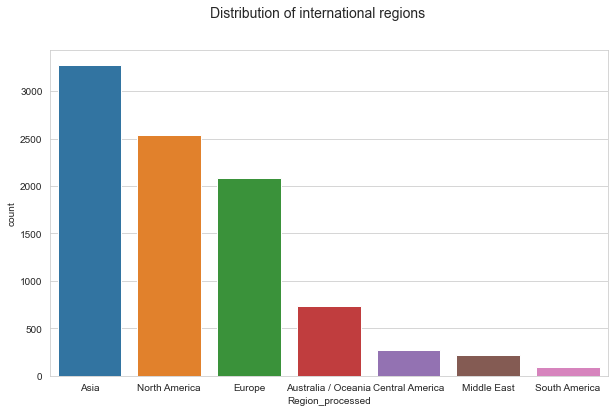

In [20]:
# visualise new Region_processed data
plt.figure(figsize=(10,6))
sns.countplot(x = "Region_processed", data = International, order = International["Region_processed"].value_counts().index)
plt.suptitle("Distribution of international regions ", fontsize = 14)
plt.show()

In [21]:
# dispose temporary Region_processed column
International.drop("Region_processed", axis = 1, inplace = True)

C:\Users\melli\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Price

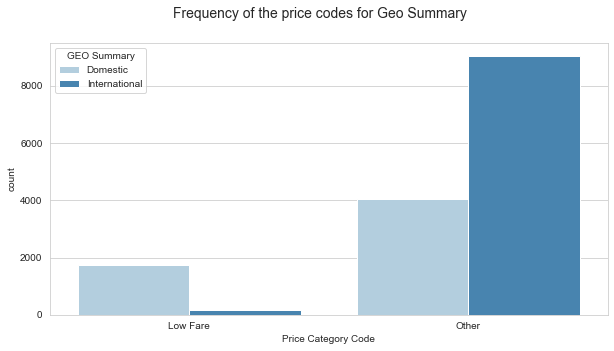

In [22]:
# review Price codes against flight type
plt.figure(figsize=(10,5))
sns.countplot(x = "Price Category Code", data = Air_traiffic, hue = "GEO Summary" , palette = 'Blues', )
plt.suptitle("Frequency of the price codes for Geo Summary", fontsize=14)
plt.show()

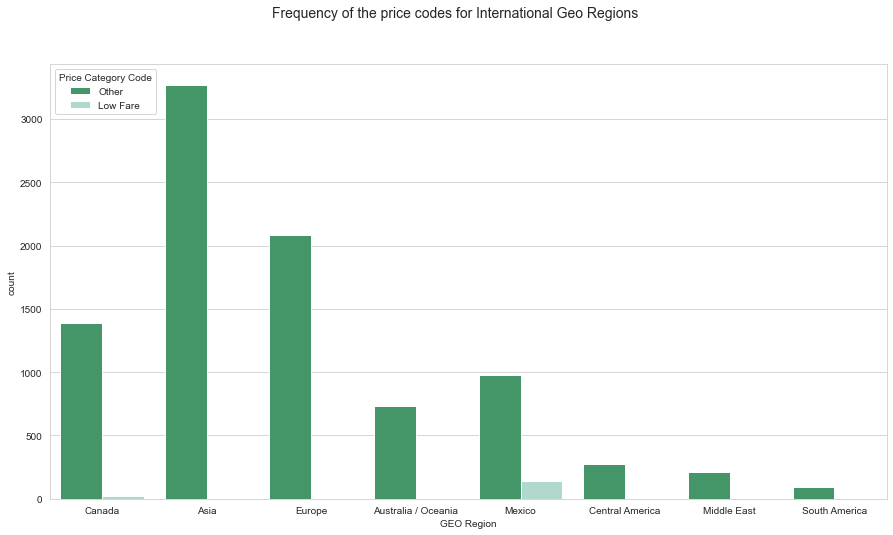

In [23]:
# price distribution for intenational flights 
plt.figure(figsize=(15,8))
sns.countplot(x = "GEO Region",  data = International, hue = "Price Category Code" , palette = 'BuGn_r', )
plt.suptitle("Frequency of the price codes for International Geo Regions", fontsize=14)
plt.show()

## Terminal


Text(0.5, 1.05, 'Terminal separated by GEO Summary')

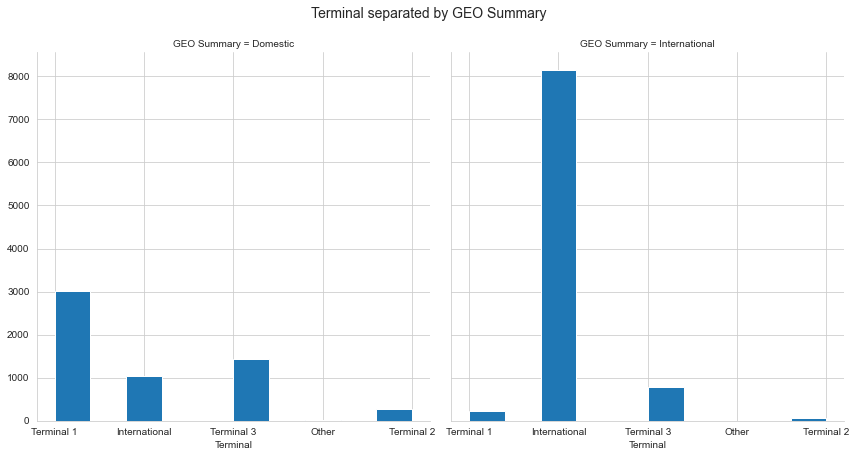

In [24]:
# terminals for different flights
g = sns.FacetGrid(Air_traiffic, col="GEO Summary", sharex=False, height = 6)
g.map(plt.hist, "Terminal")
plt.suptitle("Terminal separated by GEO Summary", fontsize = 14, y=1.05)

### Other Terminals

In [25]:
#examining list of flights using the "other" terminal
Air_traiffic[Air_traiffic["Terminal"]== "Other"].head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Period_no,Month_no
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August,2005-08-01,8
1163,200605,Ameriflight,A8,Ameriflight,A8,Domestic,US,Thru / Transit,Other,Other,Other,8,Thru / Transit * 2,16,2006,May,2006-05-01,5
1275,200606,Ameriflight,A8,Ameriflight,A8,Domestic,US,Deplaned,Other,Other,Other,5,Deplaned,5,2006,June,2006-06-01,6
1276,200606,Ameriflight,A8,Ameriflight,A8,Domestic,US,Enplaned,Other,Other,Other,5,Enplaned,5,2006,June,2006-06-01,6
1505,200608,Ameriflight,A8,Ameriflight,A8,Domestic,US,Enplaned,Other,Other,Other,7,Enplaned,7,2006,August,2006-08-01,8


In [26]:
#lits of airlines in order of popularity using the "other" terminal
print("List of airlines using the \"Other\" terminal")
Air_traiffic[Air_traiffic["Terminal"]== "Other"]["Operating Airline"].value_counts()

List of airlines using the "Other" terminal


Ameriflight                         22
Evergreen International Airlines     2
Atlas Air, Inc                       2
Boeing Company                       1
Name: Operating Airline, dtype: int64

In [27]:
#max passengers travling through the "other" terminal for a given flight
Air_traiffic[Air_traiffic["Terminal"]== "Other"]["Passenger Count"].max()

65

## Passenger Count

In [28]:
# exclude flights using other terminals
Air_traiffic.drop(Air_traiffic[Air_traiffic["Terminal"]== "Other"].index, axis = 0, inplace= True)

#update international and domestic subtables
International = Air_traiffic[Air_traiffic["GEO Summary"] =="International" ]
Domestic = Air_traiffic[Air_traiffic["GEO Summary"] =="Domestic" ]

In [29]:
#revised total international passenger count
International["Passenger Count"].sum()

100671495

In [30]:
#revised total domestic passenger count
Domestic["Passenger Count"].sum()

338140805

In [31]:
# difference between domestic and internationla passenger numbers
Domestic["Passenger Count"].sum()-International["Passenger Count"].sum()

237469310

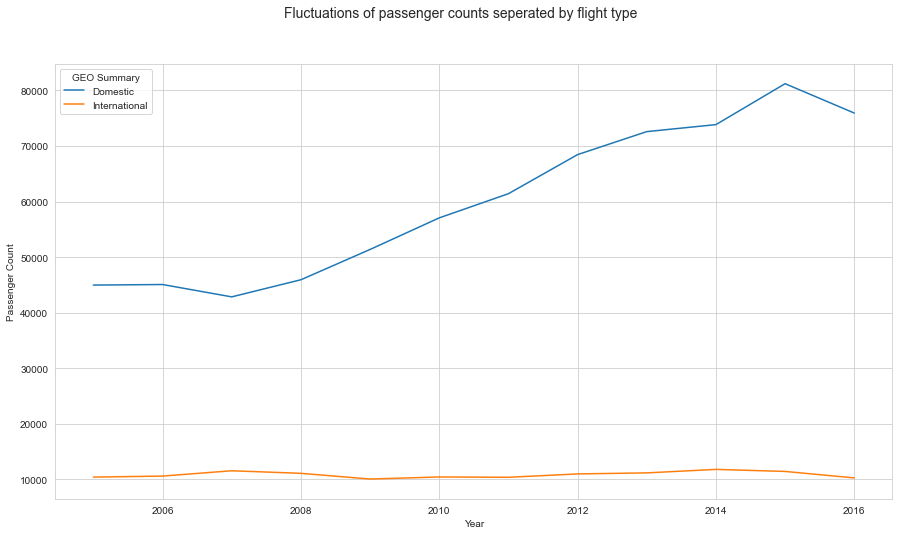

In [32]:
# fluctuations in passenger numbers over the years
plt.figure(figsize=(15,8))
sns.lineplot(x ="Year", y = "Passenger Count", data = Air_traiffic, hue = "GEO Summary", ci = None)
plt.suptitle("Fluctuations of passenger counts seperated by flight type", fontsize=14, )
plt.show()

In [33]:
# assessing the number of entries recorded for every year in the dataset
Air_traiffic["Year"].value_counts()

2015    1460
2008    1427
2007    1402
2009    1393
2011    1390
2010    1383
2012    1378
2014    1368
2006    1358
2013    1356
2005     694
2016     371
Name: Year, dtype: int64

In [34]:
# oldest entry for 2005 
Air_traiffic[Air_traiffic["Year"]==2005]["Period_no"].min()

Timestamp('2005-07-01 00:00:00')

In [35]:
# oldest entry for 2016 
Air_traiffic[Air_traiffic["Year"]==2016]["Period_no"].max()

Timestamp('2016-03-01 00:00:00')

In [36]:
#dropping 2005 and 2016 data
AT2006_2015 = Air_traiffic[(Air_traiffic['Period_no'] >= pd.Timestamp('2006-01-01 00:00:00')) &
                           (Air_traiffic['Period_no'] <= pd.Timestamp('2015-12-31 00:00:00'))]

Text(0.5, 0.98, 'Passenger numbers over time ')

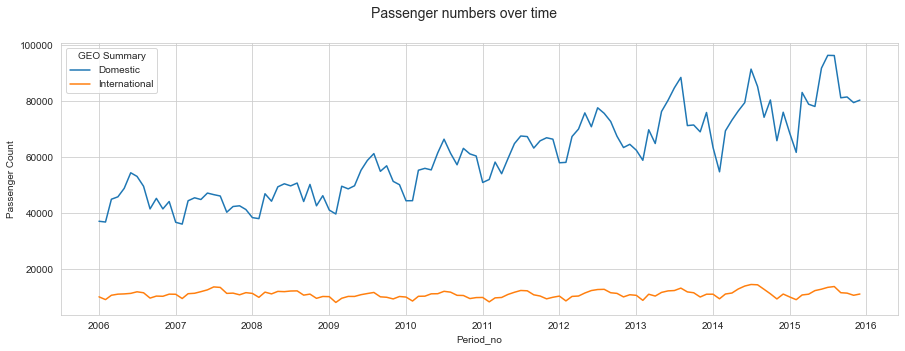

In [37]:
# time series of passenger numbers sepertated by flight type
plt.figure(figsize=(15,5))
sns.lineplot(x ="Period_no", y = "Passenger Count", data = AT2006_2015, hue = "GEO Summary", ci = None )
plt.suptitle("Passenger numbers over time ", fontsize=14, )

Text(0.5, 0.98, 'Passenger numbers over time for domestic flights')

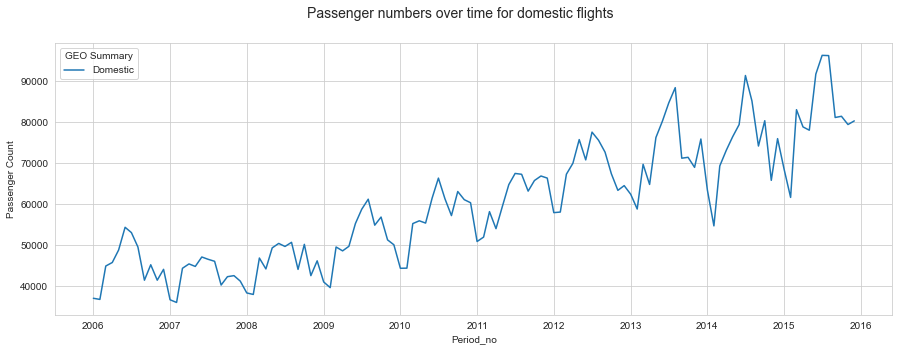

In [38]:
# time series of passenger numbers for domestic flights

plt.figure(figsize=(15,5))
sns.lineplot(x ="Period_no", y = "Passenger Count", data = AT2006_2015[AT2006_2015["GEO Summary"]=="Domestic"], hue = "GEO Summary", ci = None )
plt.suptitle("Passenger numbers over time for domestic flights", fontsize=14, )

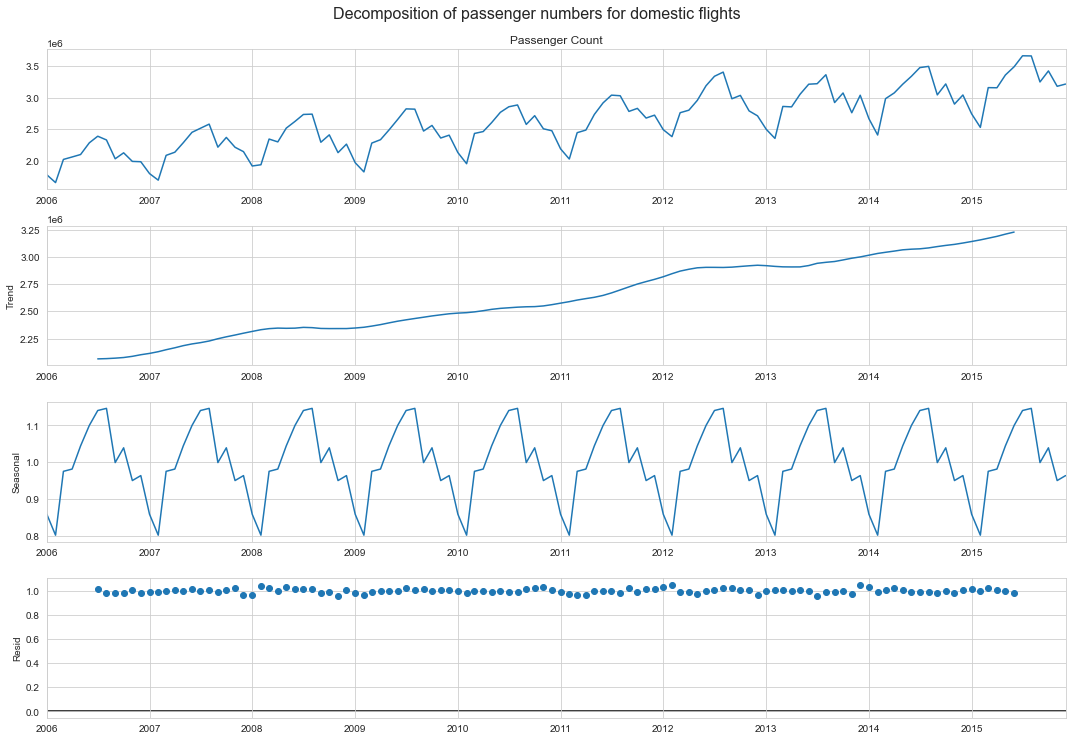

In [39]:
# restructure data for time series review 
Domestic_updated =AT2006_2015[AT2006_2015["GEO Summary"]=="Domestic"][["Period_no", "Passenger Count"]]

Domestic_updated = Domestic_updated.groupby("Period_no").sum()
Domestic_updated.head()

# graphical representation of seasonal decomposition of domestic passenger numbers overtime
results = seasonal_decompose(Domestic_updated["Passenger Count"], model = "mul")
results.plot();
plt.suptitle('Decomposition of passenger numbers for domestic flights', y = 1.025, fontsize = 16)
plt.show()

Text(0.5, 0.98, 'Passenger numbers over time for international flights')

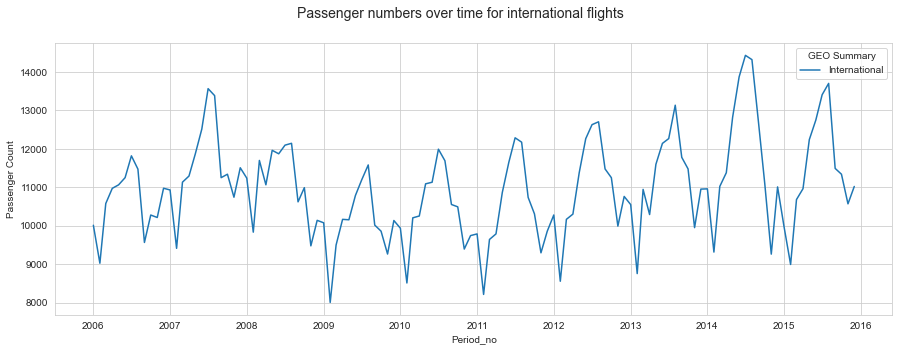

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(x ="Period_no", y = "Passenger Count", data = AT2006_2015[AT2006_2015["GEO Summary"]=="International"], hue = "GEO Summary", ci = None )
plt.suptitle("Passenger numbers over time for international flights", fontsize=14, )

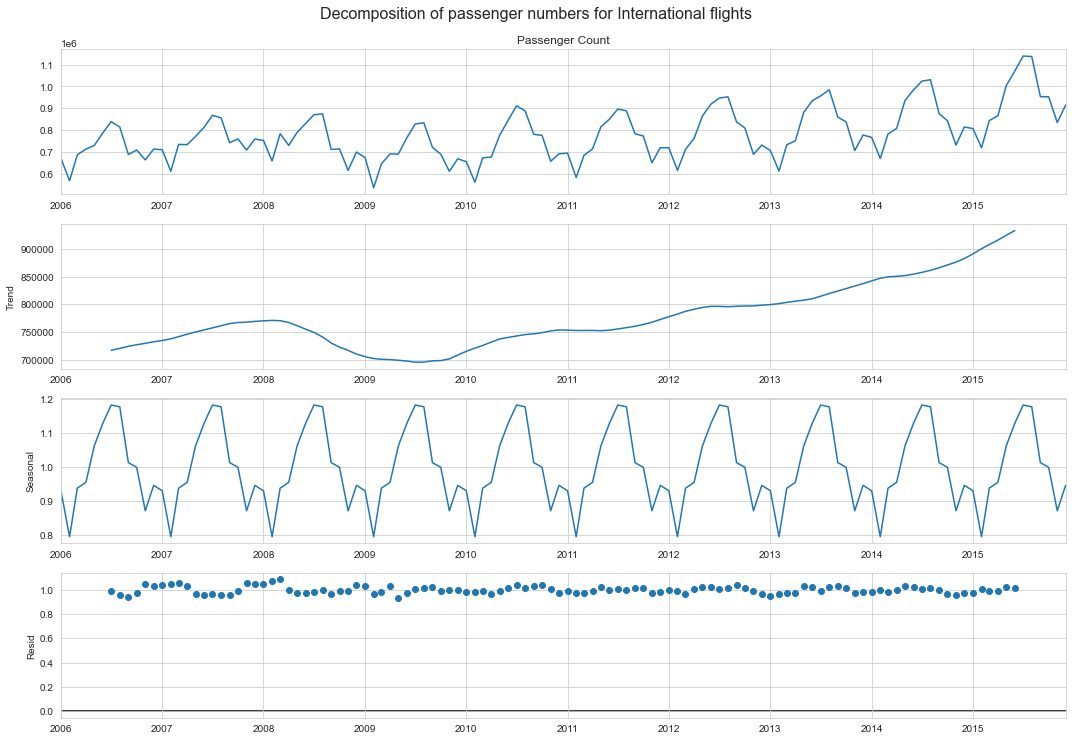

In [41]:
# restructure data for time series review 
International_updated =AT2006_2015[AT2006_2015["GEO Summary"]=="International"][["Period_no", "Passenger Count"]]

International_updated = International_updated.groupby("Period_no").sum()

# graphical representation of seasonal decomposition of domestic passenger numbers overtime
results = seasonal_decompose(International_updated["Passenger Count"], model = "mul")
results.plot();

plt.suptitle('Decomposition of passenger numbers for International flights', y = 1.025, fontsize = 16)
plt.show()

### Clutsters

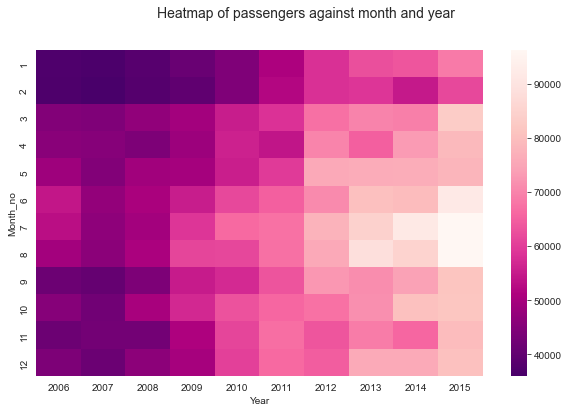

In [42]:
# restructure data for heatmap
Domestic2006_2015 = AT2006_2015[AT2006_2015["GEO Summary"] =="Domestic" ]
DomPivot = Domestic2006_2015.pivot_table(values='Passenger Count',index='Month_no',columns='Year')

# Month_no is used here instead of Month to ensure that in the heatmap the y axis appears in the correct order

plt.figure(figsize = (10,6))
sns.heatmap(DomPivot, cmap = "RdPu_r")
plt.suptitle("Heatmap of passengers against month and year", fontsize = 14,)
plt.show()

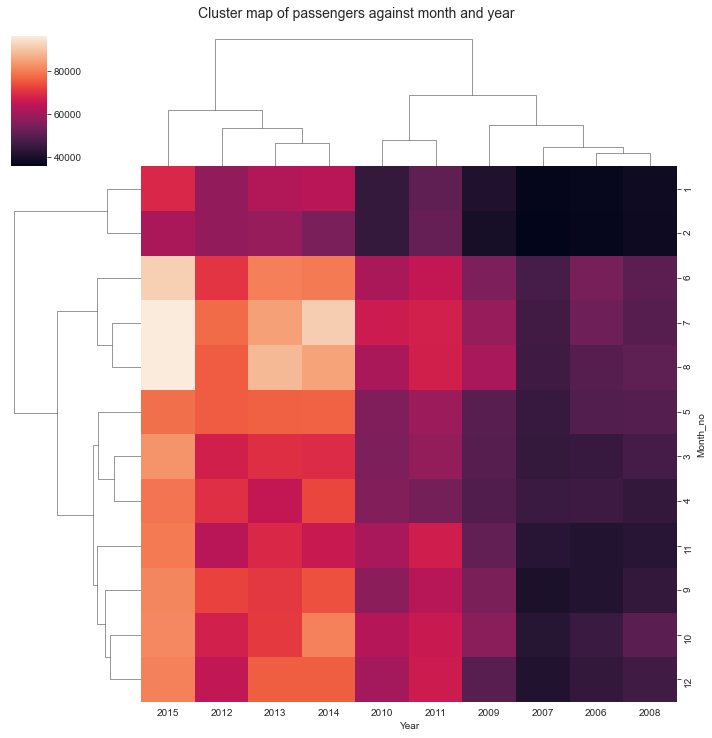

In [43]:
# create cluster map of passenger numbers 
sns.clustermap(DomPivot)
plt.suptitle("Cluster map of passengers against month and year", fontsize = 14, y = 1.02)
plt.show()

# Activity Type Code

In [44]:
# activity code for international flights
International["Activity Type Code"].value_counts()

Deplaned          4385
Enplaned          4330
Thru / Transit     493
Name: Activity Type Code, dtype: int64

In [45]:
# activity code for domestic flights
Domestic["Activity Type Code"].value_counts()

Deplaned          2675
Enplaned          2672
Thru / Transit     425
Name: Activity Type Code, dtype: int64

Text(0.5, 1.05, 'Activity Type Code separated by GEO Summary')

<Figure size 648x432 with 0 Axes>

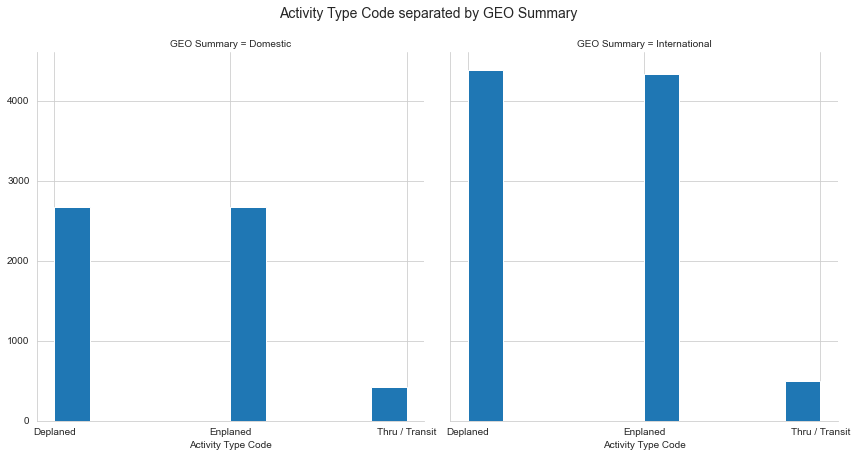

In [46]:
#graphical representation of activity codes
plt.figure(figsize = (9,6))
g = sns.FacetGrid(Air_traiffic, col="GEO Summary", sharex=False, height = 6)
g.map(plt.hist, "Activity Type Code")
plt.suptitle("Activity Type Code separated by GEO Summary", fontsize = 14, y=1.05)

Text(0.5, 0.98, 'Time series of domestic passenger count separated by activity type code')

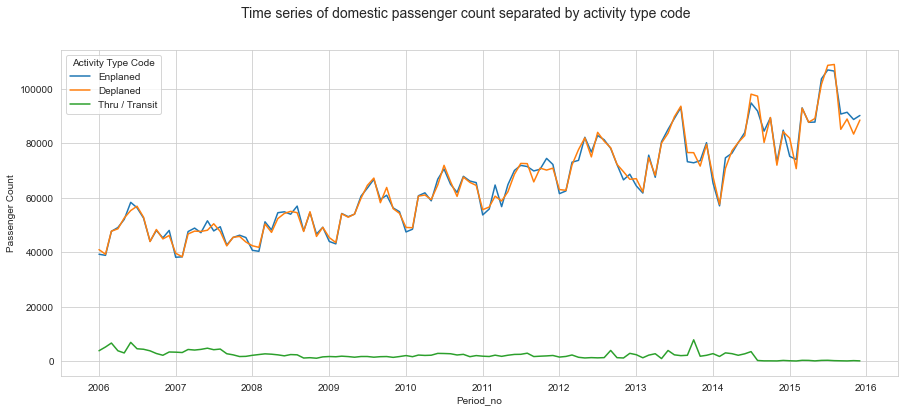

In [47]:
# activity code fluctuations overtime for domestic flights
plt.figure(figsize=(15,6))
sns.lineplot(x ="Period_no", y = "Passenger Count", data = Domestic2006_2015, hue = "Activity Type Code", ci = None)
plt.suptitle("Time series of domestic passenger count separated by activity type code", fontsize=14)

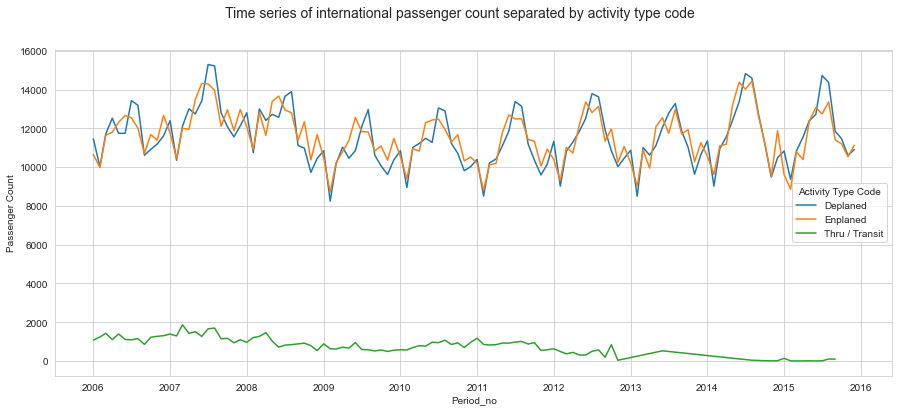

In [49]:
# activity code fluctuations overtime for international flights
International2006_2015 = AT2006_2015[AT2006_2015["GEO Summary"] =="International" ]

plt.figure(figsize=(15,6))
sns.lineplot(x ="Period_no", y = "Passenger Count", data = International2006_2015, hue = "Activity Type Code", ci = None)
plt.suptitle("Time series of international passenger count separated by activity type code", fontsize = 14)
plt.show()

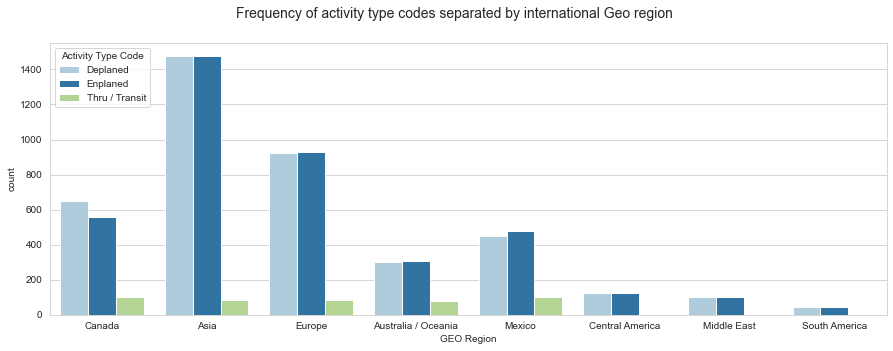

In [50]:
# activity code seperated by destination for international flight
plt.figure(figsize=(15,5))
sns.countplot(x = "GEO Region", data = International2006_2015, hue = "Activity Type Code" , palette = "Paired" )
plt.suptitle("Frequency of activity type codes separated by international Geo region", fontsize =14)
plt.show()

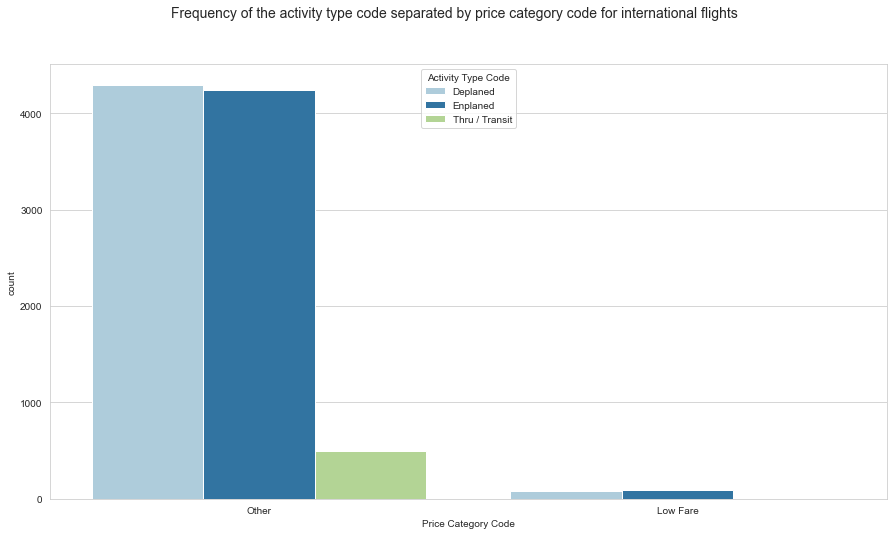

In [51]:
# activity code seperated by price code for international flights
plt.figure(figsize=(15,8))
sns.countplot(x = "Price Category Code", data = International, hue = "Activity Type Code" , palette = 'Paired', )
plt.suptitle(
    "Frequency of the activity type code separated by price category code for international flights",
    fontsize =14)
plt.show()

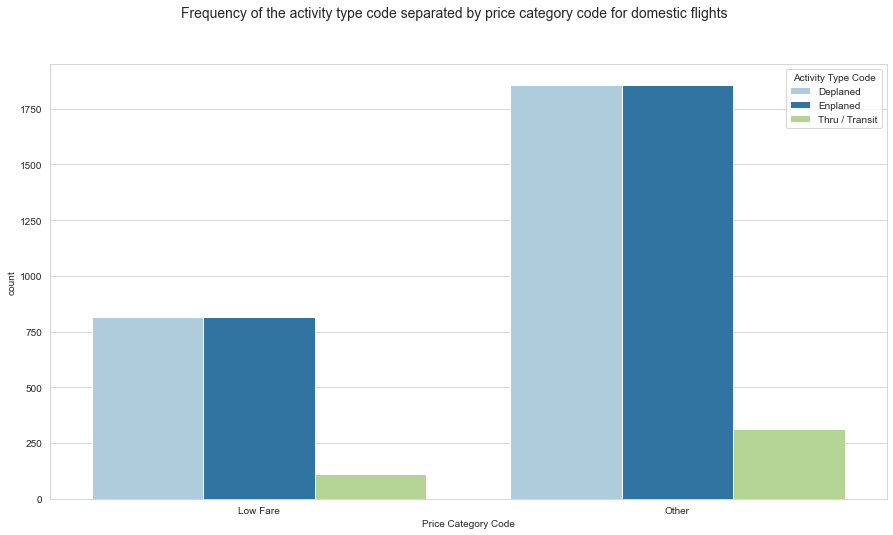

In [52]:
# activity code seperated by price code for domestic flights
plt.figure(figsize=(15,8))
sns.countplot(x = "Price Category Code", data = Domestic, hue = "Activity Type Code" , palette = 'Paired')
plt.suptitle(
    "Frequency of the activity type code separated by price category code for domestic flights",
    fontsize =14)
plt.show()